<a href="https://colab.research.google.com/github/samkitkankariya/Malicious-File-Path-Predictor/blob/main/malacious_file_path_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing


1. **Data Pre-processing:**
   - The code begins by importing the necessary libraries, such as `csv` for handling CSV files and `pandas` for data manipulation.
   - It defines file paths for both malicious and benign datasets and an output CSV file path for storing preprocessed data.

2. **Reading and Handling Data Files:**
   - It uses `with open` statements to read data from the malicious and benign files, handling potential file not found errors with error messages and exiting the script if an error occurs.
   - Malicious and benign data are read into separate lists (`malicious_data` and `benign_data`) with UTF-8 encoding and stripping whitespace characters.

3. **Data Extraction and Transformation:**
   - The code extracts information from each file path, such as the path without the filename, the file name, file type (extension), and classification (malicious or benign).
   - It processes each file path using list comprehensions and string manipulation techniques to extract the required information.
   - Extracted information is stored in a list of lists (`data_rows`) for further processing.

4. **DataFrame Creation and Data Inspection:**
   - The extracted data is used to create a pandas DataFrame (`df`) with appropriate column names.
   - The code checks for missing values (null or NaN) in the DataFrame using `isnull().sum()` and prints the count of missing values for each column.
   - It also checks for duplicate rows in the DataFrame using `duplicated().sum()` and prints the count of duplicate rows.

5. **Data Cleaning and Transformation:**
   - Duplicate rows in the DataFrame are handled by removing them using `drop_duplicates()` if necessary.
   - The cleaned and transformed data is saved to a CSV file (`output_csv_file`) using `to_csv()` with the `index=False` parameter to exclude the index column from the saved file.

6. **Output and Completion:**
   - The code prints a message indicating the completion of data preprocessing and the path where the preprocessed dataset is saved along with its shape (number of rows and columns).

Overall, the code demonstrates the essential steps of data pre-processing for an ML project, including data reading, extraction, transformation, cleaning, and saving the preprocessed data for further analysis and modeling.

In [ ]:
#data pre-processing save this in your collab without filename in filepath

import csv
import pandas as pd

# Define file paths
malicious_file_path = "dataset_file_path_malicious.txt"
benign_file_path = "dataset_file_path_benign.txt"
output_csv_file = "malicious_and_benign_data.csv"  # Target for preprocessed data

# Initialize rows list for data from both files
data_rows = []

# Read entries from the malicious file
try:
    with open(malicious_file_path, "r", encoding="utf-8") as malicious_file:
        malicious_data = [line.strip() for line in malicious_file.readlines()]
except FileNotFoundError:
    print(f"Error: Malicious file '{malicious_file_path}' not found.")
    exit(1)

# Read entries from the benign file
try:
    with open(benign_file_path, "r", encoding="utf-8") as benign_file:
        benign_data = [line.strip() for line in benign_file.readlines()]
except FileNotFoundError:
    print(f"Error: Benign file '{benign_file_path}' not found.")
    exit(1)

# Extract file path
for file_path in malicious_data:
    try:
        path_only = "\\".join(file_path.split("\\")[:-1])  # Extract path without filename
        file_name = file_path.split("\\")[-1]  # Extract file name
        file_type = file_name.split(".")[-1]  # Extract file type
        classification = "malicious"
        data_rows.append([path_only, file_name, file_type, classification])
    except IndexError:
        print(f"Warning: Malformed file path encountered: {file_path}")

for file_path in benign_data:
    try:
        path_only = "\\".join(file_path.split("\\")[:-1])  # Extract path without filename
        file_name = file_path.split("\\")[-1]  # Extract file name
        file_type = file_name.split(".")[-1]  # Extract file type
        classification = "benign"
        data_rows.append([path_only, file_name, file_type, classification])
    except IndexError:
        print(f"Warning: Malformed file path encountered: {file_path}")

# Create DataFrame
df = pd.DataFrame(data_rows, columns=["File Path", "File Name", "File Type", "Classification"])

# Check for missing values (null or NaN) in the DataFrame
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle duplicate rows
duplicates_count = df.duplicated().sum()
print("\nDuplicate Rows Count:", duplicates_count)


df = df.drop_duplicates()  # Remove duplicates

# Save the preprocessed data to the CSV file
df.to_csv(output_csv_file, index=False)
print("Preprocessed dataset saved to", output_csv_file, df.shape)


Missing values:
 File Path         0
File Name         0
File Type         0
Classification    0
dtype: int64

Duplicate Rows Count: 12323
Preprocessed dataset saved to malicious_and_benign_data.csv (248824, 4)


# Encoding



1. **Loading Data and Importing Libraries:**
   - The code begins by importing pandas as pd and LabelEncoder from sklearn.preprocessing.

2. **Loading the CSV File:**
   - It uses pd.read_csv() to load the preprocessed CSV file ("malicious_and_benign_data.csv") into a pandas DataFrame (df).

3. **Encoding Categorical Variables:**
   - LabelEncoder is used to encode the 'Classification' column, which contains categorical data ('malicious' and 'benign'). The encoder assigns numeric labels to each category ('malicious': 0, 'benign': 1).
   - Categorical variables 'File Path', 'File Name', and 'File Type' are also encoded using LabelEncoder. Each unique value in these columns is assigned a numeric label.

4. **Saving the Encoded DataFrame:**
   - The encoded DataFrame is saved to a new CSV file ("encoded_data.csv") using df.to_csv() with the index parameter set to False to exclude the index column from the saved file.

5. **Output Confirmation:**
   - The code prints a message confirming that categorical encoding is completed and the encoded data is saved to "encoded_data.csv".

Overall, this code segment demonstrates the process of encoding categorical variables using LabelEncoder, a common technique used in machine learning to transform categorical data into numeric format suitable for model training.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv("malicious_and_benign_data.csv")

# Encode the 'Classification' column using LabelEncoder
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

# Encode categorical variables
df['File Path'] = label_encoder.fit_transform(df['File Path'])
df['File Name'] = label_encoder.fit_transform(df['File Name'])
df['File Type'] = label_encoder.fit_transform(df['File Type'])

# Save the encoded DataFrame to a new CSV file
df.to_csv("encoded_data.csv", index=False)

print("Categorical encoding completed and saved to 'encoded_data.csv'.")


Categorical encoding completed and saved to 'encoded_data.csv'.


# Data Splitting for Machine Learning Model Training and Testing


1. **Train-Test Split for Benign and Malicious Data:**
   - The benign data (benign_df) is split into train (80%) and test (20%) sets using train_test_split with a random state for reproducibility.
   - Similarly, the malicious data (malicious_df) is split into train and test sets with the same proportions and random state.


2. **Separating Features and Target Variables:**
   - Features (X) and the target variable (y) are separated for both the training (train_data) and testing (test_data) sets.
   - Features are obtained by dropping the 'Classification' column, and the target variable is extracted as the 'Classification' column.

3. **Saving Train and Test Data to CSV Files:**
   - The train and test data are saved to separate CSV files (X_train.csv, X_test.csv, y_train.csv, y_test.csv) using to_csv() with the index parameter set to False to exclude the index column from the saved files.


This code segment demonstrates the essential steps of splitting data into train and test sets for machine learning model training and evaluation, ensuring that the model is trained on a subset of data and tested on unseen data for performance assessment.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the encoded CSV file into a DataFrame
df_encoded = pd.read_csv("encoded_data.csv")

# Split the data into benign and malicious DataFrames
benign_df = df_encoded[df_encoded['Classification'] == 0]
malicious_df = df_encoded[df_encoded['Classification'] == 1]

# Split the benign data into train and test sets (10% for testing)
benign_train, benign_test = train_test_split(benign_df, test_size=0.2, random_state=42)

# Split the malicious data into train and test sets (10% for testing)
malicious_train, malicious_test = train_test_split(malicious_df, test_size=0.2, random_state=42)

# Concatenate the train data back together
train_data = pd.concat([benign_train, malicious_train])

# Concatenate the test data back together
test_data = pd.concat([benign_test, malicious_test])

# Separate features (X) and target variable (y) for training data
X_train = train_data.drop(columns=['Classification'])  # Features for training
y_train = train_data['Classification']  # Target variable for training

# Separate features (X) and target variable (y) for testing data
X_test = test_data.drop(columns=['Classification'])  # Features for testing
y_test = test_data['Classification']  # Target variable for testing

# Save the train and test data to separate CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Train and test datasets created successfully.")


Train and test datasets created successfully.


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)



Shape of X_train: (199059, 3)
Shape of y_train: (199059,)


# ML MODELS

## **Random Forest Classifier**


1. **Model Training and Evaluation with Random Forest Classifier**

   - **Model Loading:** Checks if a cached model exists. If yes, loads the model; otherwise, proceeds to train a new model.
   - **Data Loading:** Loads the training and testing data from CSV files.
   - **Model Initialization:** Initializes a Random Forest Classifier with specified parameters (e.g., number of estimators).
   - **Model Training:** Trains the Random Forest Classifier using the training data.
   - **Model Caching:** Saves the trained model for future use (caching).
   - **Model Prediction:** Uses the trained model to make predictions on the test data.
   - **Performance Metrics Calculation:** Calculates accuracy, confusion matrix, precision, recall, and F1 score for the classifier.
   - **Output Formatting:** Formats the output metrics (e.g., accuracy, precision) for better readability.
   - **Output Display:** Prints the calculated metrics (accuracy, precision, recall, F1 score) for the Random Forest Classifier.
   - **Confusion Matrix Visualization:** Plots and displays the confusion matrix using seaborn and matplotlib libraries.

This code segment demonstrates the complete pipeline of training a Random Forest Classifier, evaluating its performance using various metrics, and visualizing the results using a confusion matrix plot.

Trained Random Forest model cached.
Random Forest Classifier Metrics:
Accuracy: 98.53%
Precision: 98.52%
Recall: 98.59%
F1 Score: 98.56%


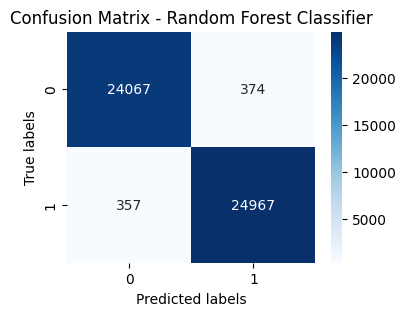

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check if the cached model exists
if os.path.exists("cached_model_rf.joblib"):
    # Load the cached model
    rf_classifier = load("cached_model_rf.joblib")
    print("Cached Random Forest model loaded.")
else:
    # Load the training and testing data from CSV files with header rows
    X_train = pd.read_csv("X_train.csv")
    y_train = pd.read_csv("y_train.csv", header=None).iloc[1:, 0]  # Assuming y_train has one column

    X_test = pd.read_csv("X_test.csv")
    y_test = pd.read_csv("y_test.csv", header=None).iloc[1:, 0]  # Assuming y_test has one column

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the Random Forest Classifier
    rf_classifier.fit(X_train, y_train)

    # Cache the trained model
    dump(rf_classifier, "cached_model_rf.joblib")
    print("Trained Random Forest model cached.")

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate precision, recall, and F1-score manually
true_positives_rf = conf_matrix_rf[1, 1]
false_positives_rf = conf_matrix_rf[0, 1]
false_negatives_rf = conf_matrix_rf[1, 0]

precision_rf = true_positives_rf / (true_positives_rf + false_positives_rf)
recall_rf = true_positives_rf / (true_positives_rf + false_negatives_rf)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

# Format the output in percentage and prettify the output
accuracy_percent_rf = f"{accuracy_rf * 100:.2f}%"
precision_percent_rf = f"{precision_rf * 100:.2f}%"
recall_percent_rf = f"{recall_rf * 100:.2f}%"
f1_percent_rf = f"{f1_rf * 100:.2f}%"

# Print the metrics
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_percent_rf)
print("Precision:", precision_percent_rf)
print("Recall:", recall_percent_rf)
print("F1 Score:", f1_percent_rf)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


## **Gradient Boosting Classifier**

Here's a summarized overview of the main steps in the provided code segment for training a Gradient Boosting Classifier and evaluating its performance:


1. **Model Initialization and Training:**
   - Initializes a Gradient Boosting Classifier with specified parameters (e.g., number of estimators) if a cached model is not found.
   - Trains the Gradient Boosting Classifier using the training data.

2. **Model Caching:**
   - Saves the trained model for future use (caching).

3. **Model Prediction and Performance Evaluation:**
   - Uses the trained model to make predictions on the test data.
   - Calculates accuracy, confusion matrix, precision, recall, and F1 score for the Gradient Boosting Classifier.


4. **Confusion Matrix Visualization:**
   - Plots and displays the confusion matrix using seaborn and matplotlib libraries.

This code segment demonstrates the complete pipeline of training a Gradient Boosting Classifier, evaluating its performance using various metrics, and visualizing the results using a confusion matrix plot.

Trained Gradient Boosting model cached.
Gradient Boosting Classifier Metrics:
Accuracy: 98.60%
Precision: 99.22%
Recall: 98.02%
F1 Score: 98.62%


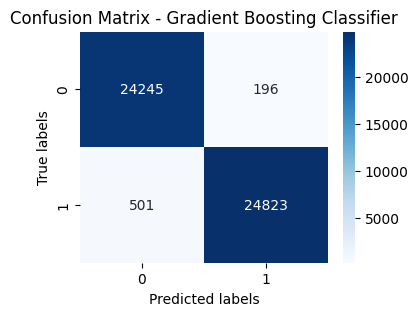

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Check if the cached model exists
if os.path.exists("cached_model_gb.joblib"):
    # Load the cached model
    gb_classifier = load("cached_model_gb.joblib")
    print("Cached Gradient Boosting model loaded.")
else:
    # Load the training and testing data from CSV files with header rows
    X_train = pd.read_csv("X_train.csv")
    y_train = pd.read_csv("y_train.csv", header=None).iloc[1:, 0]  # Assuming y_train has one column

    X_test = pd.read_csv("X_test.csv")
    y_test = pd.read_csv("y_test.csv", header=None).iloc[1:, 0]  # Assuming y_test has one column

    # Initialize the Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Train the Gradient Boosting Classifier
    gb_classifier.fit(X_train, y_train)

    # Cache the trained model
    dump(gb_classifier, "cached_model_gb.joblib")
    print("Trained Gradient Boosting model cached.")

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Calculate confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Calculate precision, recall, and F1-score manually
true_positives_gb = conf_matrix_gb[1, 1]
false_positives_gb = conf_matrix_gb[0, 1]
false_negatives_gb = conf_matrix_gb[1, 0]

precision_gb = true_positives_gb / (true_positives_gb + false_positives_gb)
recall_gb = true_positives_gb / (true_positives_gb + false_negatives_gb)
f1_gb = 2 * (precision_gb * recall_gb) / (precision_gb + recall_gb)

# Format the output in percentage and prettify the output
accuracy_percent_gb = f"{accuracy_gb * 100:.2f}%"
precision_percent_gb = f"{precision_gb * 100:.2f}%"
recall_percent_gb = f"{recall_gb * 100:.2f}%"
f1_percent_gb = f"{f1_gb * 100:.2f}%"

# Print the metrics
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_percent_gb)
print("Precision:", precision_percent_gb)
print("Recall:", recall_percent_gb)
print("F1 Score:", f1_percent_gb)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


## Comparision of Random Classifier & Gradient Boosting Classifier

In [ ]:
from tabulate import tabulate

# Additional Insights as a Pretty Table
additional_insights = [
    ["Random Forest Classifier", f"{accuracy_rf * 100:.2f}%", f"{precision_rf * 100:.2f}%", f"{recall_rf * 100:.2f}%", f"{f1_rf * 100:.2f}%"],
    ["Gradient Boosting Classifier", f"{accuracy_gb * 100:.2f}%", f"{precision_gb * 100:.2f}%", f"{recall_gb * 100:.2f}%", f"{f1_gb * 100:.2f}%"]
]

headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"]
table = tabulate(additional_insights, headers=headers, tablefmt="pretty")

print(table)

# Additional Interesting Insight
print("\nAdditional Interesting Insight:")
print("Random Forest Classifier has higher accuracy and F1-score compared to Gradient Boosting Classifier, \nWhile Gradient Boosting Classifier shows slightly higher precision and recall.")


+------------------------------+----------+-----------+--------+----------+
|          Classifier          | Accuracy | Precision | Recall | F1-Score |
+------------------------------+----------+-----------+--------+----------+
|   Random Forest Classifier   |  98.53%  |  98.52%   | 98.59% |  98.56%  |
| Gradient Boosting Classifier |  98.60%  |  99.22%   | 98.02% |  98.62%  |
+------------------------------+----------+-----------+--------+----------+

Additional Interesting Insight:
Random Forest Classifier has higher accuracy and F1-score compared to Gradient Boosting Classifier, 
While Gradient Boosting Classifier shows slightly higher precision and recall.


## Neural Network Classifier

Epoch 1/10
5599/5599 [==============================] - 26s 4ms/step - loss: 6.2088 - accuracy: 0.6756 - val_loss: 0.4633 - val_accuracy: 0.8052
Epoch 2/10
5599/5599 [==============================] - 23s 4ms/step - loss: 0.7536 - accuracy: 0.7490 - val_loss: 1.6750 - val_accuracy: 0.8135
Epoch 3/10
5599/5599 [==============================] - 23s 4ms/step - loss: 0.5424 - accuracy: 0.7040 - val_loss: 0.6517 - val_accuracy: 0.9860
Epoch 4/10
5599/5599 [==============================] - 22s 4ms/step - loss: 0.5705 - accuracy: 0.6339 - val_loss: 0.5709 - val_accuracy: 0.9996
Epoch 5/10
5599/5599 [==============================] - 24s 4ms/step - loss: 0.5714 - accuracy: 0.6297 - val_loss: 0.5945 - val_accuracy: 0.9988
Epoch 6/10
5599/5599 [==============================] - 22s 4ms/step - loss: 0.5675 - accuracy: 0.6338 - val_loss: 0.5928 - val_accuracy: 0.9991
Epoch 7/10
5599/5599 [==============================] - 23s 4ms/step - loss: 0.5651 - accuracy: 0.6352 - val_loss: 0.5912 - val_ac

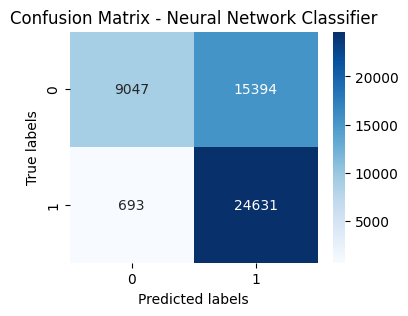

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import os
from joblib import dump

# Load the CSV files into DataFrames
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None).iloc[1:, 0]

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv", header=None).iloc[1:, 0]

# Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Initialize the neural network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Save the trained model
dump(model, "cached_model_nn.joblib")

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred)

print("Neural Network Classifier Metrics:")
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Neural Network Classifier')
plt.show()


# Failed attempts to get path as input from User

In [ ]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv("malicious_and_benign_data.csv")

# Filter the data to get 2000 entries of each class
malicious_df = df[df['Classification'] == 'malicious'].head(2000)
benign_df = df[df['Classification'] == 'benign'].head(2000)

# Concatenate the filtered dataframes
filtered_df = pd.concat([malicious_df, benign_df])

# Save the filtered data to a new CSV file
filtered_df.to_csv("filtered_data.csv", index=False)

print("Filtered CSV file created successfully.")


Filtered CSV file created successfully.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load

# Load the CSV file into a DataFrame
df = pd.read_csv("filtered_data.csv")

# Encode the 'Classification' column using LabelEncoder
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

# Convert 'File Type' using OneHotEncoder
onehot_encoder_file_type = OneHotEncoder(sparse=False)
file_type_encoded = onehot_encoder_file_type.fit_transform(df[['File Type']])
file_type_encoded_df = pd.DataFrame(file_type_encoded, columns=onehot_encoder_file_type.get_feature_names_out())
df = pd.concat([df, file_type_encoded_df], axis=1)
df.drop(columns=['File Type'], inplace=True)

# Convert 'File Path' using OneHotEncoder
onehot_encoder_file_path = OneHotEncoder(sparse=False)
file_path_encoded = onehot_encoder_file_path.fit_transform(df[['File Path']])
file_path_encoded_df = pd.DataFrame(file_path_encoded, columns=onehot_encoder_file_path.get_feature_names_out())
df = pd.concat([df, file_path_encoded_df], axis=1)
df.drop(columns=['File Path'], inplace=True)

# Convert 'File Name' using OneHotEncoder
onehot_encoder_file_name = OneHotEncoder(sparse=False)
file_name_encoded = onehot_encoder_file_name.fit_transform(df[['File Name']])
file_name_encoded_df = pd.DataFrame(file_name_encoded, columns=onehot_encoder_file_name.get_feature_names_out())
df = pd.concat([df, file_name_encoded_df], axis=1)
df.drop(columns=['File Name'], inplace=True)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Classification'])
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Cache the encoder and classifier
dump(label_encoder, "label_encoder.joblib")
dump(onehot_encoder_file_type, "onehot_encoder_file_type.joblib")
dump(onehot_encoder_file_path, "onehot_encoder_file_path.joblib")
dump(onehot_encoder_file_name, "onehot_encoder_file_name.joblib")
dump(rf_classifier, "rf_classifier.joblib")

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load

# Load the CSV file into a DataFrame
df = pd.read_csv("filtered_data.csv")

# Encode the 'Classification' column using LabelEncoder
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

# Convert 'File Type' using OneHotEncoder
onehot_encoder_file_type = OneHotEncoder(sparse=False)
file_type_encoded = onehot_encoder_file_type.fit_transform(df[['File Type']])
file_type_encoded_df = pd.DataFrame(file_type_encoded, columns=onehot_encoder_file_type.get_feature_names_out())
df = pd.concat([df, file_type_encoded_df], axis=1)
df.drop(columns=['File Type'], inplace=True)

# Convert 'File Path' using OneHotEncoder
onehot_encoder_file_path = OneHotEncoder(sparse=False)
file_path_encoded = onehot_encoder_file_path.fit_transform(df[['File Path']])
file_path_encoded_df = pd.DataFrame(file_path_encoded, columns=onehot_encoder_file_path.get_feature_names_out())
df = pd.concat([df, file_path_encoded_df], axis=1)
df.drop(columns=['File Path'], inplace=True)

# Convert 'File Name' using OneHotEncoder
onehot_encoder_file_name = OneHotEncoder(sparse=False)
file_name_encoded = onehot_encoder_file_name.fit_transform(df[['File Name']])
file_name_encoded_df = pd.DataFrame(file_name_encoded, columns=onehot_encoder_file_name.get_feature_names_out())
df = pd.concat([df, file_name_encoded_df], axis=1)
df.drop(columns=['File Name'], inplace=True)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Classification'])
y = df['Classification']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_classifier.fit(X, y)

# Cache the encoder and classifier
dump(label_encoder, "label_encoder.joblib")
dump(onehot_encoder_file_type, "onehot_encoder_file_type.joblib")
dump(onehot_encoder_file_path, "onehot_encoder_file_path.joblib")
dump(onehot_encoder_file_name, "onehot_encoder_file_name.joblib")
dump(rf_classifier, "rf_classifier.joblib")

# Get input from the user (file path)
file_path = input("Enter the file path: ")

# Split the file path into file path without file name, file name, and file type
path_only = "\\".join(file_path.split("\\")[:-1])  # Extract path without filename
file_name = file_path.split("\\")[-1]  # Extract file name
file_type = file_name.split(".")[-1]  # Extract file type

# Encode the input using the same pattern as the encoded dataset
path_encoded = onehot_encoder_file_path.transform([[path_only]])
name_encoded = onehot_encoder_file_name.transform([[file_name]])
type_encoded = onehot_encoder_file_type.transform([[file_type]])

# Combine the encoded features
encoded_features = pd.DataFrame(path_encoded, columns=onehot_encoder_file_path.get_feature_names_out())
encoded_features = pd.concat([encoded_features, pd.DataFrame(name_encoded, columns=onehot_encoder_file_name.get_feature_names_out())], axis=1)
encoded_features = pd.concat([encoded_features, pd.DataFrame(type_encoded, columns=onehot_encoder_file_type.get_feature_names_out())], axis=1)

# Ensure feature names are in the same order as during training
encoded_features = encoded_features.reindex(columns=onehot_encoder_file_path.get_feature_names_out(), fill_value=0)

# Predict using the trained Random Forest Classifier
prediction = rf_classifier.predict(encoded_features)

# Decode the prediction using the label encoder
predicted_class = label_encoder.inverse_transform(prediction)[0]

# Print the predicted class (malicious or benign)
print("Predicted Class:", predicted_class)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Enter the file path: C:\Program Files\7-Zip\7-zip.chm


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- File Name_4GBPatch.cff
- File Name_7-zip.chm
- File Name_7-zip.dll
- File Name_7-zip32.dll
- File Name_7z.dll
- ...


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the CSV file into a DataFrame
df = pd.read_csv("malicious_and_benign_data.csv")

# Encode the 'Classification' column using LabelEncoder
label_encoder = LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

# Encode categorical variables
df['File Path'] = label_encoder.fit_transform(df['File Path'])
df['File Name'] = label_encoder.fit_transform(df['File Name'])
df['File Type'] = label_encoder.fit_transform(df['File Type'])

# Save the encoded DataFrame to a new CSV file
df.to_csv("encoded_data.csv", index=False)

print("Categorical encoding completed and saved to 'encoded_data.csv'.")

# Split the data into train and test sets
X = df.drop(columns=['Classification'])
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Cache the trained model
dump(rf_classifier, "cached_model_rf.joblib")
print("Trained Random Forest model cached.")

# Define function to predict whether a file path is benign or malicious
def predict_malicious(filepath):
    # Encode the input filepath
    path_only = "\\".join(filepath.split("\\")[:-1])  # Extract path without filename
    file_name = filepath.split("\\")[-1]  # Extract file name
    file_type = file_name.split(".")[-1]  # Extract file type

    # Encode each part
    path_encoded = label_encoder.transform([path_only])[0]
    file_name_encoded = label_encoder.transform([file_name])[0]
    file_type_encoded = label_encoder.transform([file_type])[0]

    # Predict using the trained model
    prediction = rf_classifier.predict([[path_encoded, file_name_encoded, file_type_encoded]])
    if prediction[0] == 0:
        return "Benign"
    else:
        return "Malicious"

# Example usage:
user_filepath = "C:\\Windows\\PolicyDefinitions\\en-US\\iSCSI.adml"
prediction_result = predict_malicious(user_filepath)
print("Prediction:", prediction_result)


Categorical encoding completed and saved to 'encoded_data.csv'.
Trained Random Forest model cached.


ValueError: y contains previously unseen labels: 'C:\\Windows\\PolicyDefinitions\\en-US'